In [1]:
import numpy as np
import matplotlib.pyplot as pp
import requests
import seaborn
from bs4 import BeautifulSoup

In [2]:
%matplotlib inline
seaborn.set()

In [3]:
url = 'https://www.nytimes.com/interactive/2016/us/elections/primary-calendar-and-results.html'
r = requests.get(url)
html = r.text

In [4]:
soup = BeautifulSoup(html)

In [5]:
results_html = soup.find_all("tr", "g-row-results")

In [6]:
date_str = "{} 2016"

def get_date(item):
    if len(item.contents) == 0:
        return dates[-1]
    else:
        return date_str.format(item.contents[0].contents[0])

In [7]:
dates = []
clinton_delegates = []
bernie_delegates = []

for result in results_html:
    if 'g-row-republican' in result['class']:
        continue
    dates.append(get_date(result.find_all("td","g-date")[0]))
    clinton_delegates.append(result.find_all("td", "g-Clinton")[0].contents[-1].strip())
    bernie_delegates.append(result.find_all("td", "g-Sanders")[0].contents[-1].strip())

In [8]:
import dateutil.parser as parser
dates = [np.datetime64(parser.parse(d)) for d in list(dates)]

In [9]:
dates.sort()

In [10]:
dates = dates[:len(dates)//2]
clinton_delegates = clinton_delegates[:len(clinton_delegates)//2]
bernie_delegates = bernie_delegates[:len(bernie_delegates)//2]

In [11]:
np_dates = np.array(dates)

In [12]:
primaries_series = np.arange(1, len(dates)+1)

In [13]:
clinton_delegates = [0 if item == '—' else item for item in clinton_delegates]
clinton_delegates = np.array(clinton_delegates, dtype=np.int32)

In [14]:
bernie_delegates = [0 if item == '—' else item for item in bernie_delegates]
bernie_delegates = np.array(bernie_delegates, dtype=np.int32)

In [15]:
clinton_delegates[:5]

array([23,  9, 20, 39, 44])

In [16]:
clinton_delegates_culminative = [clinton_delegates[:i].sum() for i, x in enumerate(clinton_delegates)]
bernie_delegates_culminative = [bernie_delegates[:i].sum() for i, x in enumerate(bernie_delegates)]

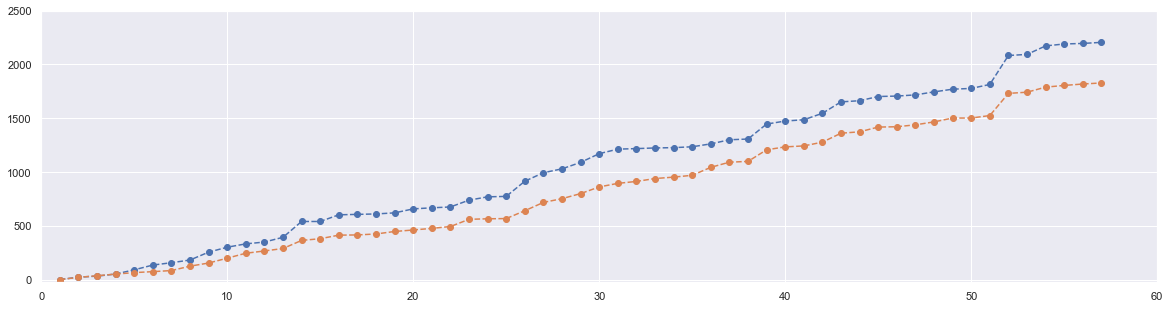

In [17]:
pp.figure(figsize=(20,5))
pp.axis([0, 60, -25, 2500])
pp.plot(primaries_series, clinton_delegates_culminative, linestyle='--', marker='o')
pp.plot(primaries_series, bernie_delegates_culminative, linestyle='--', marker='o')